In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


# 1. Problem statement

to predict sepal lenght from independent features

# 2.Data Gathering

In [4]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 3.EDA

In [6]:
df.shape

(150, 6)

In [7]:
row_count = df.shape[0]
column_count = df.shape[1]
print("Row count:",row_count)
print("column count:",column_count)

Row count: 150
column count: 6


In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df.axes

[RangeIndex(start=0, stop=150, step=1),
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object')]

In [10]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [15]:
df[df["SepalLengthCm"]==7.9]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
131,132,7.9,3.8,6.4,2.0,Iris-virginica


# 1

In [24]:
df["SepalWidthCm"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 150, dtype: float64

In [25]:
df["SepalWidthCm"].nunique()

23

<AxesSubplot: xlabel='SepalWidthCm'>

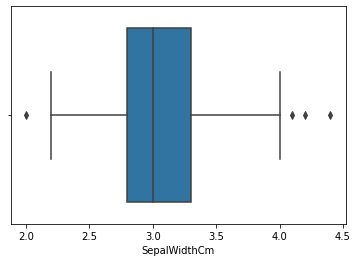

In [26]:
sns.boxplot(df["SepalWidthCm"])

<AxesSubplot: xlabel='SepalWidthCm', ylabel='Count'>

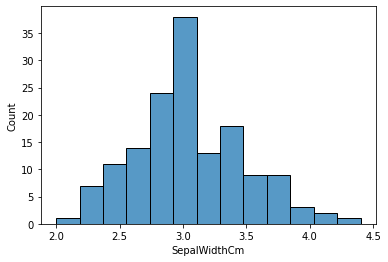

In [27]:
sns.histplot(df["SepalWidthCm"])

<AxesSubplot: xlabel='SepalWidthCm', ylabel='Density'>

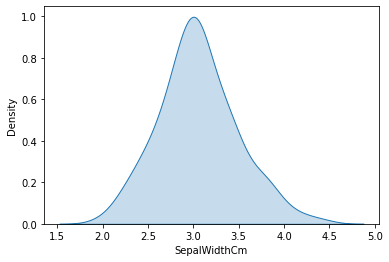

In [28]:
sns.kdeplot(df["SepalWidthCm"],fill = True)

<AxesSubplot: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

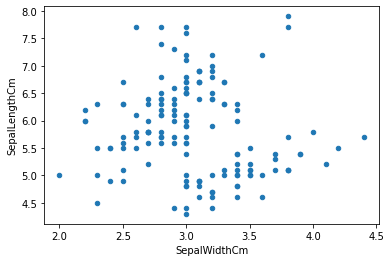

In [29]:
df.plot(x = "SepalWidthCm",y="SepalLengthCm",kind = "scatter")

# 2.

In [34]:
df["PetalWidthCm"]

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: PetalWidthCm, Length: 150, dtype: float64

In [35]:
df["PetalWidthCm"].nunique()

22

<AxesSubplot: xlabel='PetalWidthCm'>

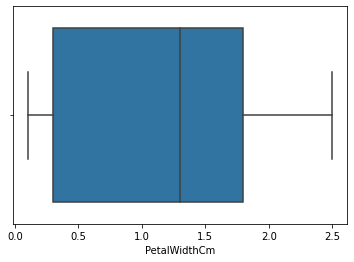

In [36]:
sns.boxplot(df["PetalWidthCm"])

<AxesSubplot: xlabel='PetalWidthCm', ylabel='Count'>

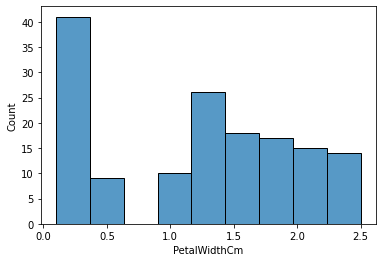

In [37]:
sns.histplot(df["PetalWidthCm"])

<AxesSubplot: xlabel='PetalWidthCm', ylabel='Density'>

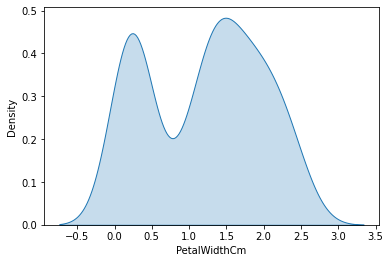

In [38]:
sns.kdeplot(df["PetalWidthCm"],fill = True)

<AxesSubplot: xlabel='PetalWidthCm', ylabel='SepalLengthCm'>

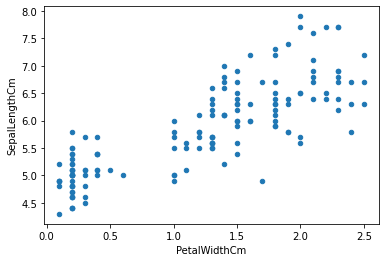

In [33]:
df.plot(x = "PetalWidthCm",y="SepalLengthCm",kind = "scatter")

<AxesSubplot: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

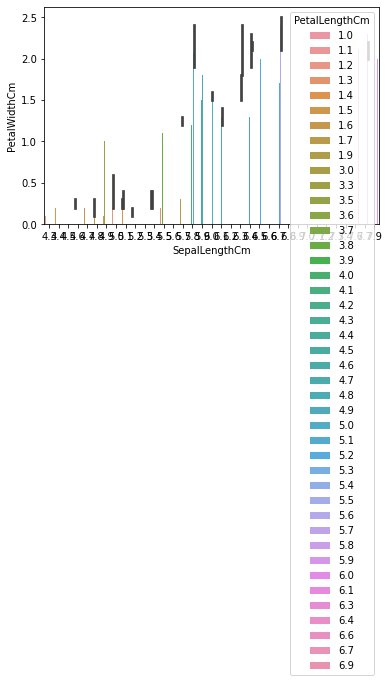

In [30]:
sns.barplot("SepalLengthCm","PetalWidthCm",hue = "PetalLengthCm",data =df)

<AxesSubplot: >

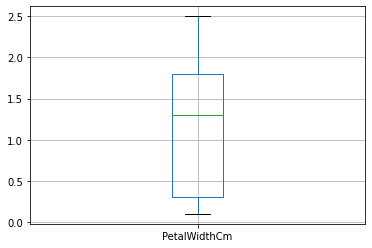

In [39]:
df[["PetalWidthCm"]].boxplot()

# 3

In [32]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df["PetalLengthCm"]

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: PetalLengthCm, Length: 150, dtype: float64

In [41]:
df["PetalLengthCm"].nunique()

43

<AxesSubplot: xlabel='PetalLengthCm'>

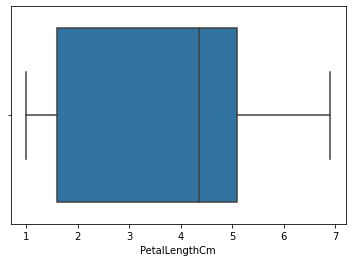

In [42]:
sns.boxplot(df["PetalLengthCm"])

<AxesSubplot: xlabel='PetalLengthCm', ylabel='Count'>

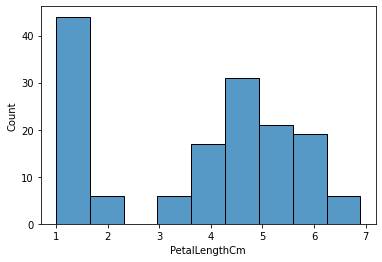

In [43]:
sns.histplot(df["PetalLengthCm"])

<AxesSubplot: xlabel='PetalLengthCm', ylabel='Density'>

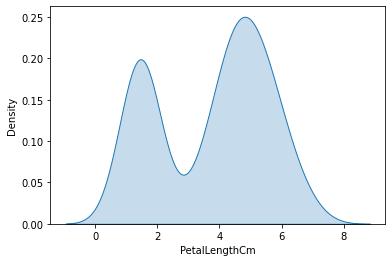

In [44]:
sns.kdeplot(df["PetalLengthCm"],fill = True)

<AxesSubplot: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

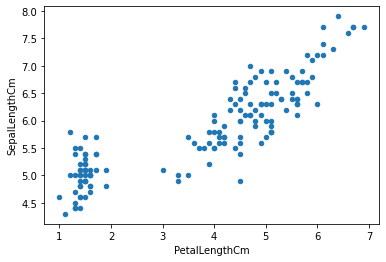

In [45]:
df.plot(x = "PetalLengthCm",y="SepalLengthCm",kind = "scatter")

# 4

In [46]:
df["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

<AxesSubplot: xlabel='Species', ylabel='count'>

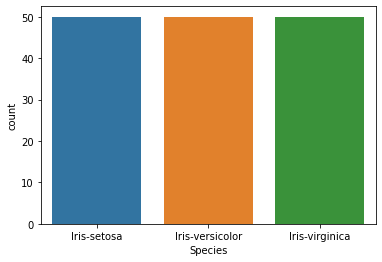

In [47]:
sns.countplot(df["Species"])

# Feature Engineering/Data Preprocessing

In [48]:
df["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [50]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [52]:
df["Species"].value_counts().to_dict()

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}

In [53]:
df["Species"] = df["Species"].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [54]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


<AxesSubplot: >

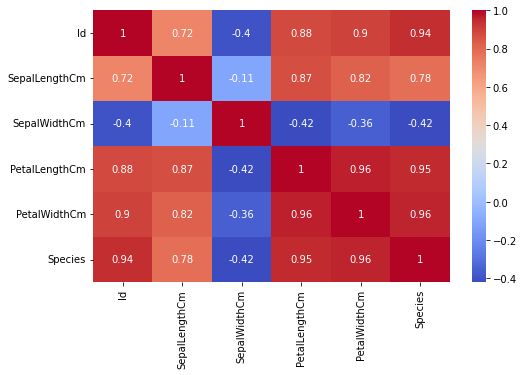

In [58]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot = True,cmap="coolwarm")

#### how to detect multicolinearity

In [59]:
# their are multicolinearity in dataset several feature show strong positive correlation
# finding correlatd feature
def correlation(dataset,threshold):
    col_corr = set() # set all the names of correlated columns
    corr_matrix= dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [61]:
correated_col = correlation(df,0.8) # we are setting threshold as 0.9
print("Feature showing multicollinearity : ")
correated_col


Feature showing multicollinearity : 


{'PetalLengthCm', 'PetalWidthCm', 'Species'}

unfortunately all feature are collinear

# Feature Selection 

In [62]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [67]:
df.drop(["Id"],inplace=True,axis = 1)

In [68]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [69]:
x = df.drop("SepalLengthCm",axis = 1)
y = df["SepalLengthCm"]

In [70]:
x

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [71]:
y

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

In [72]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

In [78]:
# df["VIF"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
# df["VIF"]

# splitting of data

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=11)

#### Scaling

In [80]:
scaler  =RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [81]:
x_train

array([[ 0.83333333, -0.82269504, -0.73333333, -0.5       ],
       [-0.5       ,  0.25531915,  0.2       ,  0.        ],
       [-1.66666667, -0.19858156, -0.2       ,  0.        ],
       [ 1.33333333,  0.62411348,  0.46666667,  0.5       ],
       [ 0.66666667, -0.79432624, -0.66666667, -0.5       ],
       [ 0.16666667,  0.19858156,  0.13333333,  0.        ],
       [ 0.        ,  0.45390071,  0.6       ,  0.5       ],
       [-0.83333333, -0.34042553, -0.13333333,  0.        ],
       [-0.16666667,  0.11347518,  0.        ,  0.        ],
       [ 0.33333333, -0.85106383, -0.73333333, -0.5       ],
       [-0.33333333,  0.53900709,  0.4       ,  0.5       ],
       [ 1.33333333, -0.73758865, -0.73333333, -0.5       ],
       [ 0.33333333,  0.4822695 ,  0.66666667,  0.5       ],
       [ 0.16666667,  0.25531915,  0.66666667,  0.5       ],
       [ 0.        ,  0.        ,  0.13333333,  0.        ],
       [-0.83333333,  0.08510638,  0.26666667,  0.5       ],
       [ 0.16666667,  0.

5.0    9
5.1    8
5.5    7
5.7    6
5.8    6
6.3    6
4.9    5
6.4    5
6.7    5
6.1    5
6.2    4
5.4    4
6.5    4
5.2    4
5.6    4
7.2    3
4.4    3
6.0    3
4.6    3
6.8    2
4.8    2
7.7    2
6.9    2
5.9    2
5.3    1
7.1    1
7.9    1
7.0    1
7.3    1
6.6    1
7.4    1
4.3    1
Name: SepalLengthCm, dtype: int64

# model building

In [85]:
lin_reg = LinearRegression().fit(x_train,y_train)
lin_reg

LinearRegression()

In [87]:
y_pred = lin_reg.predict(x_test)
y_pred[1:3]

array([6.17651405, 6.30169774])

In [88]:
residuel = y_test-y_pred
residuel

112    0.315634
145    0.523486
133   -0.001698
56    -0.235967
111    0.177972
9      0.026972
65     0.436610
15     0.107377
30    -0.106886
63    -0.258983
119    0.162660
62     0.455908
84    -0.832374
113   -0.125684
139    0.425873
41     0.378702
103   -0.318373
66    -0.632374
110    0.145085
142   -0.271801
69    -0.022345
2     -0.046420
22    -0.180575
51     0.037878
12     0.066959
11    -0.301508
149   -0.407679
75     0.401484
16     0.281974
85    -0.450614
0      0.083845
120    0.218170
122    0.402763
49     0.113593
29    -0.271760
118    0.506050
105    0.289384
77     0.174569
Name: SepalLengthCm, dtype: float64

### cheacking Assumption

<AxesSubplot: xlabel='SepalLengthCm', ylabel='Density'>

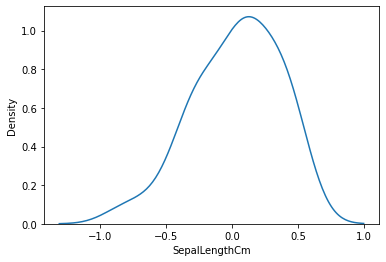

In [89]:
sns.kdeplot(residuel)

In [91]:
from scipy.stats import shapiro,kstest,normaltest

#### shapiro test

In [92]:
a,p_value = shapiro(residuel)
p_value # result shows normal distribution

0.22881664335727692

#### normal test

In [93]:
a,p_value = normaltest(residuel)
p_value

0.31528832346863833

#### kstest

In [94]:
a,p_value = kstest(residuel,"norm")
p_value

0.0015509716223016667

#### QQ plot

In [95]:
import scipy.stats as sts
import statsmodels.api as sm

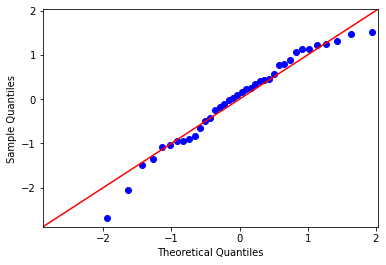

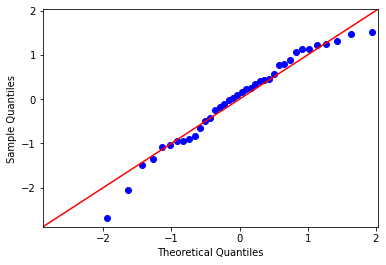

In [96]:
sm.qqplot(residuel,line = "45",dist = sts.norm,fit =True)

#### homoscadasticity

<AxesSubplot: ylabel='SepalLengthCm'>

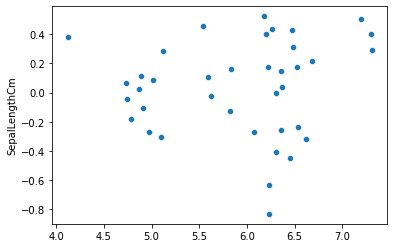

In [97]:
sns.scatterplot(y_pred,residuel)

In [98]:
##Evaluation of model
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse= np.sqrt(mse)


In [99]:
# storing evalution matrix to dataframe
results = pd.DataFrame([["Linear Regression",mse,mae,r2,rmse]],
                      columns=["Model","Mean Square Error","Mean Absolute Square","R2 Score","RMSE"])
results

,Model,Mean Square Error,Mean Absolute Square,R2 Score,RMSE
0,Linear Regression,0.105849,0.268368,0.862854,0.325345


#### Regularization/modelTuning

##### L1 Regularization

In [103]:
lasso = Lasso(alpha=0.01).fit(x_train,y_train)
y_pred = lasso.predict(x_test)

In [101]:
lasso.score(x_test,y_test)

0.846638418942026

In [102]:
lasso.score(x_train,y_train)

0.833117330797777

In [104]:
##Evaluation of model
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse= np.sqrt(mse)


In [105]:
# storing evalution matrix to dataframe
Lasso_results = pd.DataFrame([["Lasso Regression",mse,mae,r2,rmse]],
                      columns=["Model","Mean Square Error","Mean Absolute Square","R2 Score","RMSE"])
results = results.append(Lasso_results,ignore_index=True)
results

,Model,Mean Square Error,Mean Absolute Square,R2 Score,RMSE
0,Linear Regression,0.105849,0.268368,0.862854,0.325345
1,Lasso Regression,0.118365,0.271109,0.846638,0.344041


##### L2 Regularization

In [106]:
Ridge = Ridge(alpha=20).fit(x_train,y_train)
y_pred = Ridge.predict(x_test)

In [107]:
Ridge.score(x_test,y_test)

0.7229221722963596

In [108]:
Ridge.score(x_train,y_train)

0.7124023082315466

In [109]:
##Evaluation of model
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse= np.sqrt(mse)


In [110]:
# storing evalution matrix to dataframe
Ridge_results = pd.DataFrame([["Ridge Regression",mse,mae,r2,rmse]],
                      columns=["Model","Mean Square Error","Mean Absolute Square","R2 Score","RMSE"])
results = results.append(Ridge_results,ignore_index=True)
results

,Model,Mean Square Error,Mean Absolute Square,R2 Score,RMSE
0,Linear Regression,0.105849,0.268368,0.862854,0.325345
1,Lasso Regression,0.118365,0.271109,0.846638,0.344041
2,Ridge Regression,0.213849,0.369270,0.722922,0.462438
